(                     sum_sq    df          F    PR(>F)
 C(Fertilizante)  102.483066   2.0  21.889533  0.000002
 Residual          63.204702  27.0        NaN       NaN,
                      sum_sq    df          F    PR(>F)
 C(Fertilizante)    6.956632   2.0   0.732102  0.487556
 C(Solo)          223.742431   4.0  11.773095  0.000003
 Residual         180.543275  38.0        NaN       NaN,
 <Figure size 1400x600 with 2 Axes>)

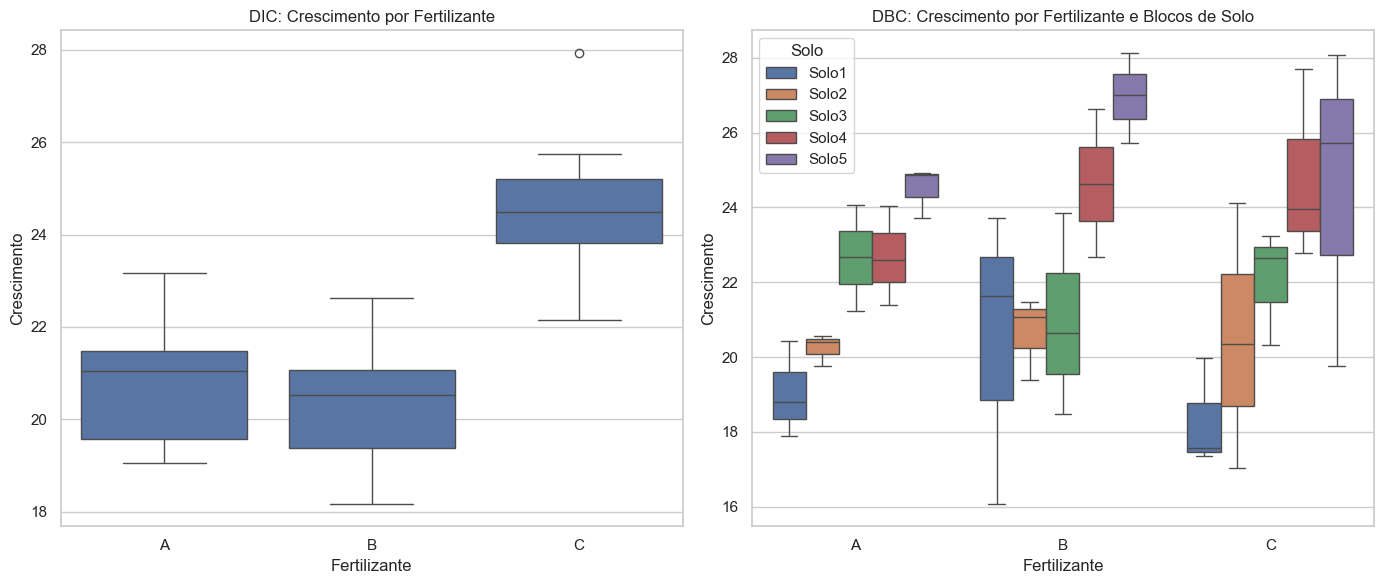

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set(style="whitegrid")

# Definindo um conjunto de dados fictício para o exemplo
np.random.seed(42)

# Dados para DIC: crescimento de plantas com três tipos de fertilizantes (A, B, C)
dic_data = pd.DataFrame({
    "Fertilizante": np.repeat(["A", "B", "C"], 10),
    "Crescimento": np.concatenate([
        np.random.normal(20, 2, 10),  # Fertilizante A
        np.random.normal(22, 2, 10),  # Fertilizante B
        np.random.normal(25, 2, 10)   # Fertilizante C
    ])
})

# Análise de variância (ANOVA) para DIC
dic_model = ols("Crescimento ~ C(Fertilizante)", data=dic_data).fit()
dic_anova = sm.stats.anova_lm(dic_model, typ=2)

# Ajustando os dados para DBC para garantir o mesmo comprimento dos arrays
dbc_data = pd.DataFrame({
    "Fertilizante": np.tile(["A", "B", "C"], 15),
    "Solo": np.repeat(["Solo1", "Solo2", "Solo3", "Solo4", "Solo5"], 9),
    "Crescimento": np.concatenate([
        np.random.normal(20, 2, 15),  # Fertilizante A
        np.random.normal(22, 2, 15),  # Fertilizante B
        np.random.normal(25, 2, 15)   # Fertilizante C
    ])
})

# Análise de variância (ANOVA) para DBC com blocos
dbc_model = ols("Crescimento ~ C(Fertilizante) + C(Solo)", data=dbc_data).fit()
dbc_anova = sm.stats.anova_lm(dbc_model, typ=2)

# Gráficos de boxplot para visualização
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x="Fertilizante", y="Crescimento", data=dic_data, ax=axs[0])
axs[0].set_title("DIC: Crescimento por Fertilizante")
sns.boxplot(x="Fertilizante", y="Crescimento", hue="Solo", data=dbc_data, ax=axs[1])
axs[1].set_title("DBC: Crescimento por Fertilizante e Blocos de Solo")
plt.tight_layout()

(dic_anova, dbc_anova, fig)
